### Breast Cancer Project Campaign using KNN classifier, Random Forest Classifier, and Support Vector Classifier (SVC) Models


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

import warnings
warnings.filterwarnings("ignore")

In [415]:
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [417]:
df.shape

(569, 33)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [421]:
#Encoding the Diagnosis label column to make it categorical. There is no need encoding other columns since they are categorical already
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

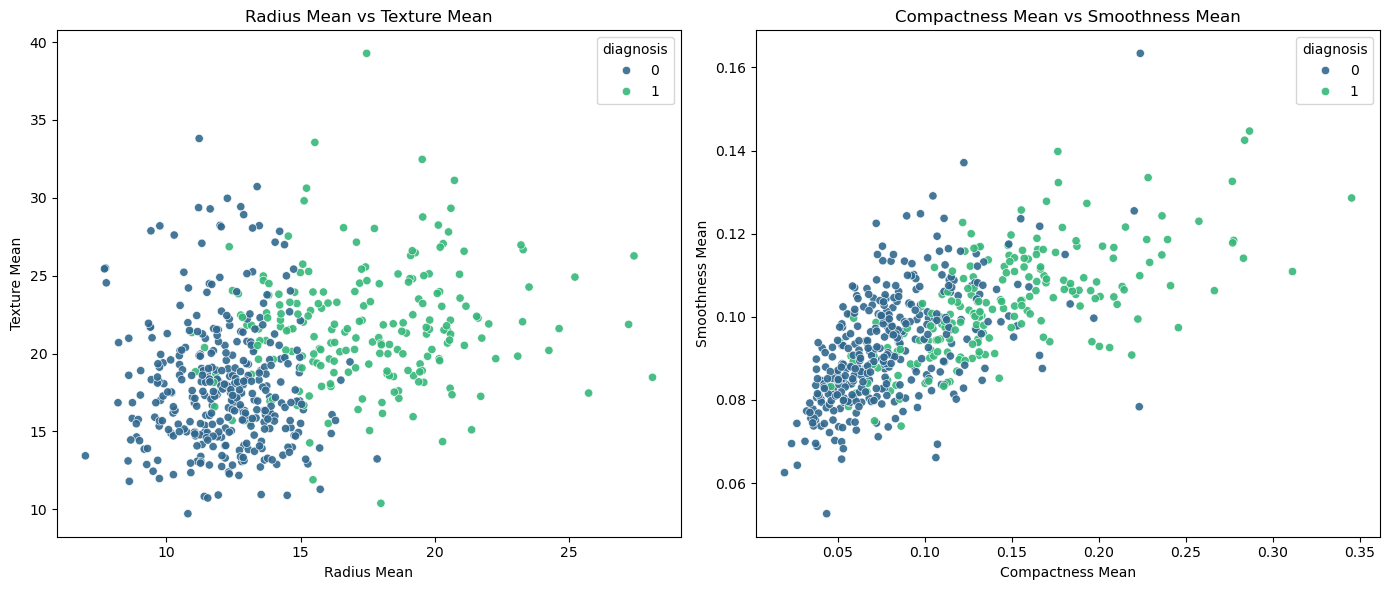

In [423]:
plt.figure(figsize=(14, 6))

# First scatter plot: radius_mean vs texture_mean
plt.subplot(1, 2, 1)
sn.scatterplot(data=df, x="radius_mean", y="texture_mean", hue="diagnosis", palette="viridis", alpha=0.9)
plt.title("Radius Mean vs Texture Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")

# Second scatter plot: compactness_mean vs smoothness_mean
plt.subplot(1, 2, 2)
sn.scatterplot(data=df, x="compactness_mean", y="smoothness_mean", hue="diagnosis", palette="viridis", alpha=0.9)
plt.title("Compactness Mean vs Smoothness Mean")
plt.xlabel("Compactness Mean")
plt.ylabel("Smoothness Mean")

# Show the plots
plt.tight_layout()
plt.show()

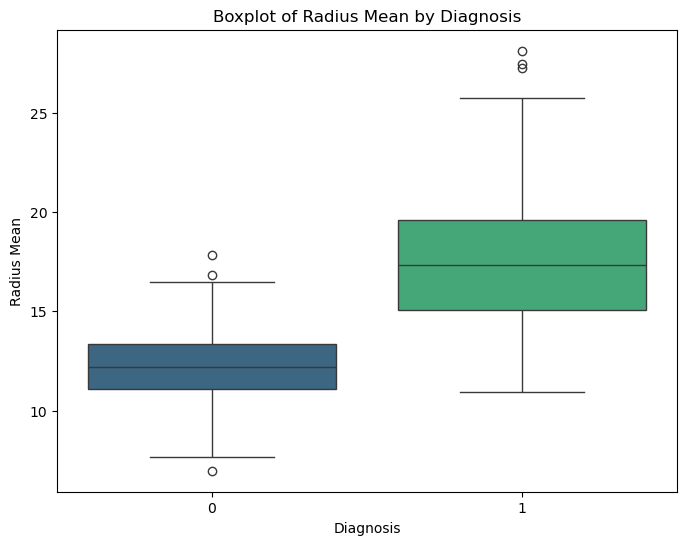

In [425]:
plt.figure(figsize=(8, 6))

# Create boxplot for diagnosis vs radius_mean (or any numerical feature)
sn.boxplot(data=df, x="diagnosis", y="radius_mean", palette="viridis")

# Title and labels
plt.title("Boxplot of Radius Mean by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.show()

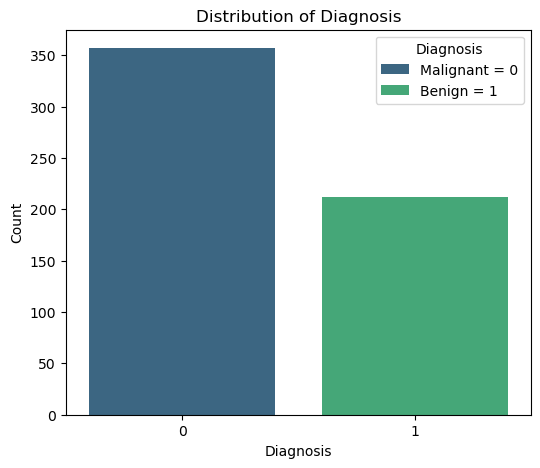

In [427]:
 #Create the countplot
plt.figure(figsize=(6, 5))
sn.countplot(data=df, x="diagnosis", palette="viridis")

# Title and labels
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title="Diagnosis", labels=["Malignant = 0", "Benign = 1"], loc="upper right")
plt.show()

In [429]:
#Drops irrelevant columns
df = df.drop(['Unnamed: 32', 'id'], axis =1)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [433]:
#checking for duplicate values 
sum(df.duplicated())

0

<Axes: >

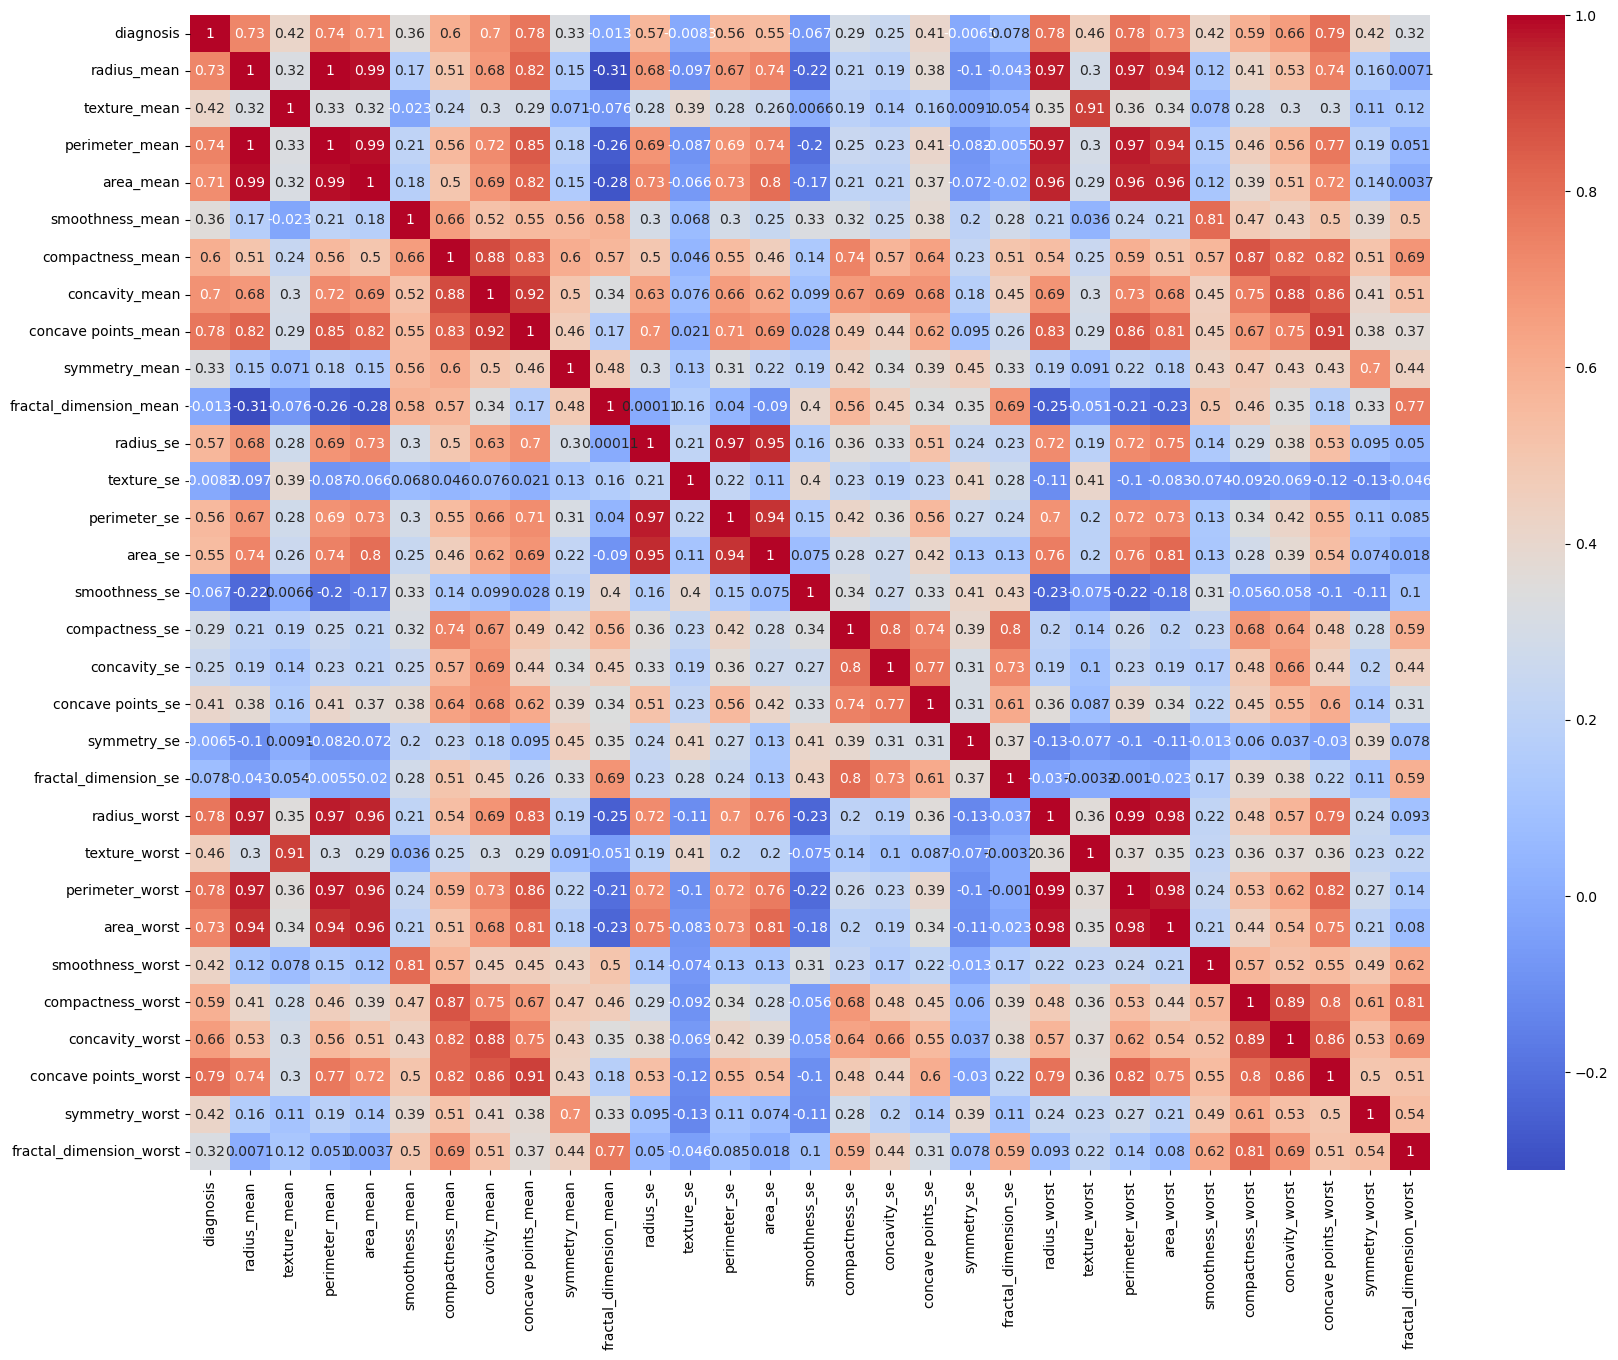

In [435]:
#Create a canvas and make a heatmap using the correlation between the variables
plt.figure(figsize=(20,15))
sn.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [436]:
# Compute the absolute correlation matrix
corr_matrix = df.corr().abs()
# Create an upper triangle matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Identify columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
new_df = df.drop(columns=to_drop)

print("Highly correlated columns to drop:", to_drop)

Highly correlated columns to drop: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


In [442]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int32  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  symmetry_worst          569 non-null    float64
dtypes: float64(12), int32(1)
memory usage: 55.7 KB
None


In [443]:
new_df.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613


In [365]:
#Get your columns and split the dataset first before scaling and then fit and transform only the training dataset, transform the test data
X = new_df.iloc[:,1:].values 
y =  new_df.iloc[:,0].values 


In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [369]:
#Retain unscaled test data for visualization later
X_test_unscaled = X_test.copy()

In [371]:
#Scale your dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Using Logistic Regression Estimator

In [374]:
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=15) # 'ovr' is for multi-class
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)
accuracy = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

print('Logistic Regression Accuracy:', accuracy) #OR it can be written in a single line print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred)
print('Logistic Regression Confusion Matrix:\n', con_matrix) # ORprint('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.965034965034965
Logistic Regression Confusion Matrix:
 [[86  3]
 [ 2 52]]


### Using SVC Model Estimator

In [377]:
modelsvc = SVC(kernel = 'linear', C=1.0, random_state=15)  #using linear kernel, C=1.0
modelsvc.fit(X_train_scaled, y_train)
y_predsvc = modelsvc.predict(X_test_scaled)
scoresvc = modelsvc.score(X_test_scaled, y_test)

print('SVM Accuracy (Linear Kernel):', accuracy_score(y_test, y_predsvc))
print('SVM Confision Matrix (Linear Kernel):\n', confusion_matrix(y_test, y_predsvc))

#Experimenting with different kernels and C values (Grid search using loops):
for kernel in ['linear', 'rbf', 'poly']:  #kernel examples
    for C in [0.1, 1, 10]:  #C examples 
        modelsvc = SVC(kernel=kernel, C=C, random_state=15, gamma='scale' if kernel != 'linear' else 'auto') #gamma='scale' for non-linear, meaning use auto for 'rbf' and'poly'
        modelsvc.fit(X_train_scaled, y_train)
        y_predsvc = modelsvc.predict(X_test_scaled)
        print(f'\nSVC Accuracy (Kernel={kernel}, C={C}):', accuracy_score(y_test, y_predsvc)) 
        #print(f'\nSVC Confusion Matrix (Kernel={kernel}, C={C}):', confusion_matrix(y_test, y_predsvc))


SVM Accuracy (Linear Kernel): 0.951048951048951
SVM Confision Matrix (Linear Kernel):
 [[85  4]
 [ 3 51]]

SVC Accuracy (Kernel=linear, C=0.1): 0.958041958041958

SVC Accuracy (Kernel=linear, C=1): 0.951048951048951

SVC Accuracy (Kernel=linear, C=10): 0.958041958041958

SVC Accuracy (Kernel=rbf, C=0.1): 0.9440559440559441

SVC Accuracy (Kernel=rbf, C=1): 0.951048951048951

SVC Accuracy (Kernel=rbf, C=10): 0.951048951048951

SVC Accuracy (Kernel=poly, C=0.1): 0.8111888111888111

SVC Accuracy (Kernel=poly, C=1): 0.8741258741258742

SVC Accuracy (Kernel=poly, C=10): 0.9300699300699301


### Using K-Nearest Neighbors (KNN) Estimators

In [380]:
modelKNN= KNeighborsClassifier(n_neighbors = 5) #k values should always be odd numbers
modelKNN.fit(X_train_scaled, y_train)
y_predKNN = modelKNN.predict(X_test_scaled)

print('KNN Accuracy (k=5):', accuracy_score(y_test, y_predKNN)) 
print('KNN Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN)) 


#Trying different k values using loops
for k in range(1,25):
    modelKNN= KNeighborsClassifier(n_neighbors = k) 
    modelKNN.fit(X_train_scaled, y_train)
    y_predKNN = modelKNN.predict(X_test_scaled)
    print(f'KNN Accuracy (k={k}): {accuracy_score(y_test, y_predKNN):.2f}')

KNN Accuracy (k=5): 0.9440559440559441
KNN Confusion Matrix:
 [[86  3]
 [ 5 49]]
KNN Accuracy (k=1): 0.93
KNN Accuracy (k=2): 0.94
KNN Accuracy (k=3): 0.92
KNN Accuracy (k=4): 0.93
KNN Accuracy (k=5): 0.94
KNN Accuracy (k=6): 0.94
KNN Accuracy (k=7): 0.94
KNN Accuracy (k=8): 0.94
KNN Accuracy (k=9): 0.94
KNN Accuracy (k=10): 0.94
KNN Accuracy (k=11): 0.94
KNN Accuracy (k=12): 0.94
KNN Accuracy (k=13): 0.94
KNN Accuracy (k=14): 0.95
KNN Accuracy (k=15): 0.95
KNN Accuracy (k=16): 0.94
KNN Accuracy (k=17): 0.95
KNN Accuracy (k=18): 0.95
KNN Accuracy (k=19): 0.96
KNN Accuracy (k=20): 0.95
KNN Accuracy (k=21): 0.95
KNN Accuracy (k=22): 0.94
KNN Accuracy (k=23): 0.94
KNN Accuracy (k=24): 0.94


### Using Decision Tree 

In [384]:
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 1000)
modelTree.fit(X_train_scaled, y_train)
y_predT = modelTree.predict(X_test_scaled)
accuracyT = accuracy_score(y_test, y_pred)
con_matrixT = confusion_matrix(y_test, y_pred)

print('Decision Tree Accuracy:', accuracyT) 
print('Decision Tree Matrix:\n', con_matrixT) 

Decision Tree Accuracy: 0.965034965034965
Decision Tree Matrix:
 [[86  3]
 [ 2 52]]


### Using Random Forest

In [387]:
from sklearn.tree import DecisionTreeClassifier
modelRF = RandomForestClassifier(n_estimators = 10, bootstrap = True)
modelRF.fit(X_train_scaled, y_train)
y_predRF = modelRF.predict(X_test_scaled)
accuracyRF = accuracy_score(y_test, y_pred)
con_matrixRF= confusion_matrix(y_test, y_pred)

print('Random Forest Accuracy:', accuracyRF) 
print('Random Forest Matrix:\n', con_matrixRF) 

Random Forest Accuracy: 0.965034965034965
Random Forest Matrix:
 [[86  3]
 [ 2 52]]


In [453]:
## Set-up 'Result' visualization:

def plotResults(predictions):
    plt.figure(figsize=(10, 3))
    sn.scatterplot(data=df, x="radius_mean", y="texture_mean", hue="diagnosis", palette="coolwarm", s=100, edgecolor="black", label="Actual")
    
    # Overlay predictions with different markers
    sn.scatterplot(x= X_test_unscaled[:,0], y=X_test_unscaled[:,1], hue=predictions, palette="coolwarm",  s=50, marker="X", edgecolor="black", label="Predicted")
    
    # Labels and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Classification Scatter Plot: Actual vs. Predictions")
    plt.legend()
    plt.show()

In [455]:
plotResults

<function __main__.plotResults(predictions)>

In [449]:
### Visualization
import matplotlib.pyplot as plt

def plot_decision_boundaries(X,y, model, title):
    h=.02 #step size in the mesh
    x_min, x_max = X[:,1].min() -1, X[:,1].max()+1
    y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,1], X[:,1], X[:,1], c=y, cmap = plt.cm.Paired, edgecolors ='k')
    plt.xlabel('Diagnosis (scaled)')
    plt.ylabel('Diagnosis (scaled)')
    plt.title(title)
    plt.show()

#Visualie (only if using 2 features)
#plot_decision_boundaries(X_test_scaled, y_test, logreg, 'Logistic Regression Decision Boundaries')
#plot_decision_boundaries(X_test_scaled, y_test, KNN, 'KNN Decision Boundaries (k=5)') #or use a specific k
    

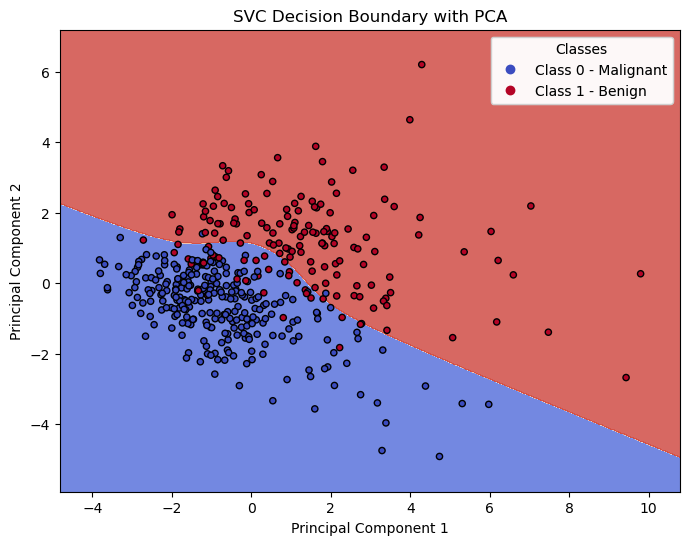

In [473]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features from 12 to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function to create meshgrid
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Function to plot decision boundary
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Fix prediction input
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Generate meshgrid
xx, yy = make_meshgrid(X_train_pca[:, 0], X_train_pca[:, 1])

# Train the model again with the reduced feature set
modelsvc.fit(X_train_pca, y_train)

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot decision boundary
plot_contours(ax, modelsvc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training data
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Add legend
legend_labels = ["Class 0 - Malignant", "Class 1 - Benign"]
legend = ax.legend(scatter.legend_elements()[0], legend_labels, title="Classes")
ax.add_artist(legend)

# Set labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("SVC Decision Boundary with PCA")

plt.show()

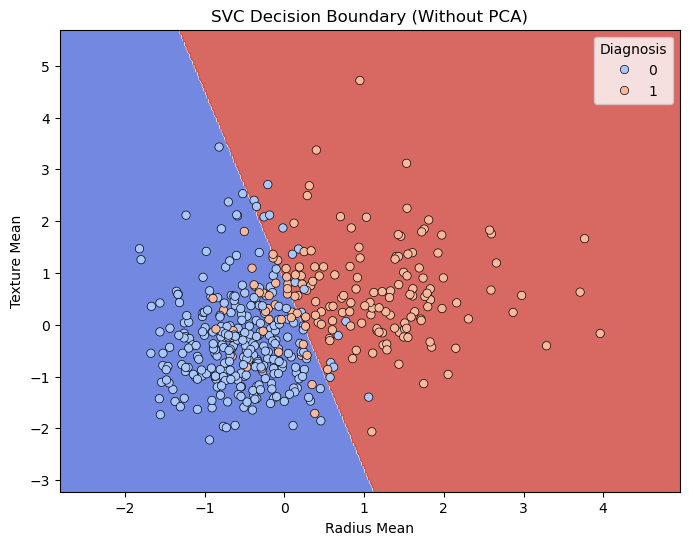

In [491]:
# Example dataset
X = df[["radius_mean", "texture_mean"]].values  # Select any 2 features
y = df["diagnosis"].values  # Target variable (0 = Malignant, 1 = Benign)

# Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVC model
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    
    # Scatter plot of training data
    sn.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")

    # Labels and title
    plt.xlabel("Radius Mean")
    plt.ylabel("Texture Mean")
    plt.title("SVC Decision Boundary (Without PCA)")
    plt.legend(title="Diagnosis")  # Automatically get legend from Seaborn
    plt.show()

# Call the function to plot
plot_decision_boundary(X_train_scaled, y_train, model)

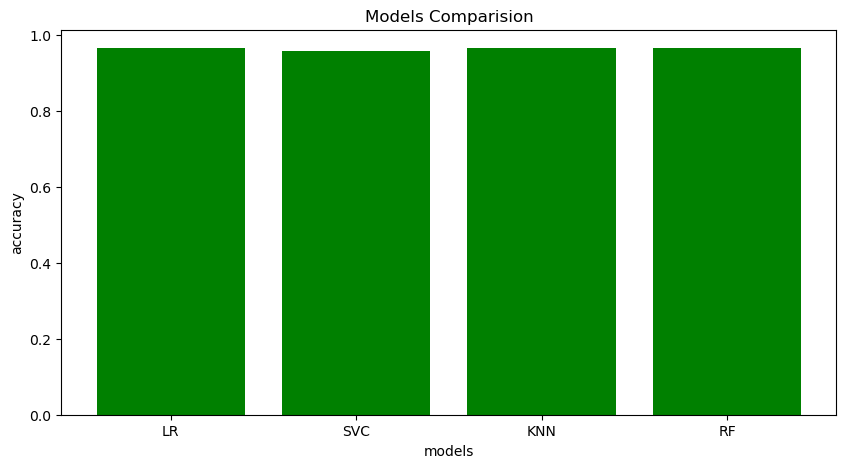

In [467]:
models = ["LR", "SVC", "KNN", "RF"]
accuracy =[0.965, 0.958, 0.965, 0.965]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color="green")
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("Accuracy of different Models")
plt.show()